In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adamax


# Load your dataset
data = pd.read_csv('/content/drive/Shareddrives/RFID_23-24/3.1 Final Setup/dataset/condensed_data_all.csv')


# Separating features and target variables
predict = ['x', 'y']
features = np.array(data.drop(predict, axis=1))
targets = np.array(data[predict])

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features_scaled, targets, test_size=0.1, random_state=42)

# Feature Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Define the neural network model
model = Sequential()
model.add(Dense(9, input_dim=x_train.shape[1], use_bias=True,bias_initializer="glorot_normal", kernel_initializer="glorot_normal"))
model.add(Dense(20, activation="relu", use_bias=True, bias_initializer="glorot_normal", kernel_initializer="glorot_normal"))
model.add(Dense(50, activation="relu", use_bias=True, bias_initializer="glorot_normal", kernel_initializer="glorot_normal"))
model.add(Dense(11, activation="relu", use_bias=True, bias_initializer="glorot_normal", kernel_initializer="glorot_normal"))
model.add(Dense(13, activation="relu", use_bias=True, bias_initializer="glorot_normal", kernel_initializer="glorot_normal"))
model.add(Dense(11, activation="relu", use_bias=True, bias_initializer="glorot_normal", kernel_initializer="glorot_normal"))
model.add(Dense(y_train.shape[1], activation='linear'))  # Output layer


# Compile the model
model.compile(optimizer=Adamax(learning_rate=0.07964), loss='mean_squared_error')

# Fit the model
model.fit(x_train, y_train, epochs=250, batch_size=10, verbose=1)

# Evaluate the model
mse = model.evaluate(x_test, y_test, verbose=0)
print(f'MSE on test data: {mse}')

# Make predictions (if needed)
# predictions = model.predict(x_test)


Epoch 1/250
25/25 [==============================] - 2s 4ms/step - loss: 16.7975
Epoch 2/250
25/25 [==============================] - 0s 4ms/step - loss: 9.8713
Epoch 3/250
25/25 [==============================] - 0s 4ms/step - loss: 8.5716
Epoch 4/250
25/25 [==============================] - 0s 3ms/step - loss: 8.3106
Epoch 5/250
25/25 [==============================] - 0s 4ms/step - loss: 8.0505
Epoch 6/250
25/25 [==============================] - 0s 5ms/step - loss: 8.0755
Epoch 7/250
25/25 [==============================] - 0s 3ms/step - loss: 7.8784
Epoch 8/250
25/25 [==============================] - 0s 2ms/step - loss: 7.8547
Epoch 9/250
25/25 [==============================] - 0s 2ms/step - loss: 7.9303
Epoch 10/250
25/25 [==============================] - 0s 2ms/step - loss: 7.9845
Epoch 11/250
25/25 [==============================] - 0s 3ms/step - loss: 7.7405
Epoch 12/250
25/25 [==============================] - 0s 3ms/step - loss: 7.3663
Epoch 13/250
25/25 [================

In [ ]:
predictions = model.predict(x_test)

1/1 [==============================] - 0s 36ms/step


<ipython-input-34-5423a35d7a3d>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot([y_test[i][0],predictions[i][0]], [y_test[i][1],predictions[i][1]], 'ro-', markersize=0, color='grey')


Text(0.5, 1.0, 'Blue are Test data; Orange are Predictions; Green are Accurate Predictions Using KNeighborsRegressor (With min and max for each antenna)')

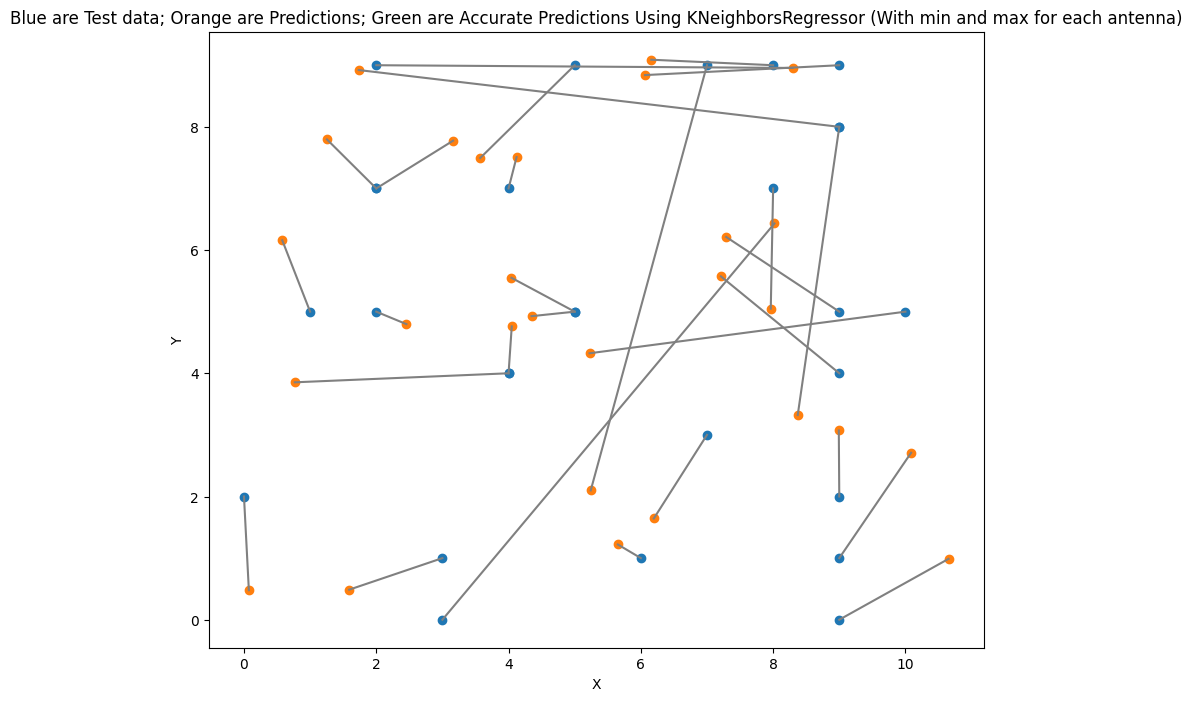

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.scatter(*zip(*y_test))
plt.scatter(*zip(*predictions))
# plt.scatter(*zip(*over_lap))
for i in range(0, len(y_test)):
    # if (y_test[i][0] == predictions[i][0] and y_test[i][1] == predictions[i][1]) :
    #     plt.plot(predictions[i])
    # else:
    plt.plot([y_test[i][0],predictions[i][0]], [y_test[i][1],predictions[i][1]], 'ro-', markersize=0, color='grey')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Blue are Test data; Orange are Predictions; Green are Accurate Predictions Using KNeighborsRegressor (With min and max for each antenna)')

In [ ]:
over_lap = []
for i in range(len(predictions)):
    if (predictions[i][0] == y_test[i][0] and predictions[i][1] == y_test[i][1]):
        over_lap.append(predictions[i])
over_lap

[]